In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_FC_PREP_0522.csv')

df.head()
df.info()
print(f'Dataset size: {df.shape}')

,POD,RATE
0,2005-07-19,2200.0
1,2005-07-20,2250.0
2,2005-07-21,2300.0
3,2005-07-22,2280.0
4,2005-07-23,2260.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POD     6375 non-null   object 
 1   RATE    6375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 99.7+ KB
Dataset size: (6375, 2)


In [39]:
df['POD'] = pd.to_datetime(df['POD'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     6375 non-null   datetime64[ns]
 1   RATE    6375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.7 KB


<h3>Improving Accuracy Scores<h3>

Tunning Random Forest </br>

<ol>
    <li>Grid search: To evaluate the performance of your model with different max_depth values. Train and evaluate your model with max_depth values ranging from 1 to 20 and select the one that gives you the best performance.</li>
    <li>Randomized search: Instead of trying every possible max_depth value, randomly sample a subset of values and evaluate the performance of your model with them.</li>
    <li>Out-of-bag (OOB) error: In a random forest model, each tree is trained on a subset of the data (known as the bootstrap sample) and uses the remaining data as out-of-bag (OOB) samples. Using OOB samples to estimate the performance of your model for different max_depth values.</li>
    <li>Visualization: Plot the performance of your model (e.g., accuracy or AUC) against different max_depth values to see if there is a clear maximum</li>
</ol>


In [40]:
# Grid Search for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Y is the target
Y = df.pop('RATE') 
X = df

# Normalise and split the data into training and testing sets
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 10, 15],
    'n_estimators': [50, 100, 200, 500]
}

# Create a random forest regressor
rf = RandomForestRegressor(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their performance
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'n_estimators': [50, 100, 200, 500]})

Best hyperparameters:  {'max_depth': 15, 'n_estimators': 200}
Best score:  0.9972187592236701


In [41]:
# Attempt to use the hyperparameters to perform Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

def evaluate_rf(X_train, X_test, y_train, y_test, best_n, best_depth):
    # Create a random forest regressor with the best hyperparameters
    rf = RandomForestRegressor(n_estimators= best_n, 
                                max_depth= best_depth, 
                                random_state=42)
    
    # Fit the model on the entire training dataset
    rf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = rf.predict(X_test)
    
    # Calculate root mean square error, R-squared value, and accuracy
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mean = y_test.mean()
    acc = (1 - rmse/mean) * 100
    
    # Print the results
    print("Root mean squared error: {:.3f}".format(rmse))
    print("R-squared value: {:.3f}".format(r2))
    print("Accuracy: {:.2f}%".format(acc))

Grid search is a hyperparameter tuning technique used to find the best set of hyperparameters for a given machine learning model. The random forest regressor is a machine learning model that uses an ensemble of decision trees to make predictions.

During grid search for a random forest regressor, a grid of possible hyperparameter combinations is created, and the model is trained and evaluated using each combination. The hyperparameters that are typically tuned during grid search for a random forest regressor include:

n_estimators: the number of decision trees in the random forest
max_features: the maximum number of features considered for splitting a node
max_depth: the maximum depth of the decision trees in the random forest
min_samples_split: the minimum number of samples required to split an internal node
min_samples_leaf: the minimum number of samples required to be at a leaf node
For each combination of hyperparameters, the model is trained using the training data and evaluated using a validation set. The performance of the model is measured using a metric such as mean squared error (MSE) or R-squared (R2). The combination of hyperparameters that results in the best performance on the validation set is selected as the optimal set of hyperparameters for the random forest regressor.

In [42]:
def train_ev_RFR(X_train, X_test, y_train, y_test):
    # Create an instance of the random forest regressor
    rf_regressor = RandomForestRegressor()

    # Train the model on the training data
    train_acc = []
    for i in range(50):
        rf_regressor.fit(X_train, y_train)
        y_pred = rf_regressor.predict(X_train)
        train_acc.append(r2_score(y_train, y_pred))

    # Evaluate the model on the testing data
    test_acc = []
    best_acc = float('-inf')
    best_iter = None
    for i in range(len(train_acc)):
        rf_regressor.fit(X_train, y_train)
        y_pred = rf_regressor.predict(X_test)
        acc = r2_score(y_test, y_pred)
        test_acc.append(acc)
        if acc > best_acc:
            best_acc = acc
            best_iter = i

    # Plot the training and testing accuracy as line graphs
    x_vals = range(len(train_acc))
    plt.plot(x_vals, train_acc, label='Training Accuracy')
    plt.plot(x_vals, test_acc, label='Testing Accuracy')
    plt.xlabel('Number of Training Iterations')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy of Random Forest Regressor')
    plt.legend()
    plt.show()

    print('Best Testing accuracy:', best_acc, 'at iteration', best_iter)
    # return train_acc, test_acc, best_acc, best_iter

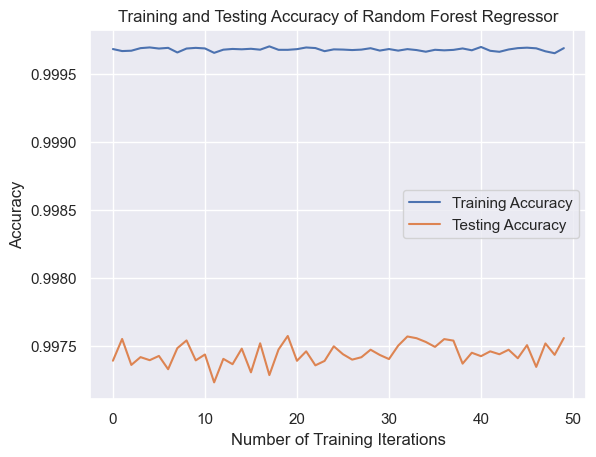

Best Testing accuracy: 0.9975711709406624 at iteration 19


In [43]:
train_ev_RFR(X_train, X_test, y_train, y_test)

From the above tunning to find the max depth, n_estimator and samples. It is concluded that the final values to give the best results is this:
<ol>
    <li>Max Depth: 15</li>
    <li>N_estimator: 200</li>
    <li>Sample: 42</li>
</ol>

In [44]:
# Attempt to use the hyperparameters to perform Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

def evaluate_rf(X_train, X_test, y_train, y_test, best_n, best_depth, sample):
    # Create a random forest regressor with the best hyperparameters
    rf = RandomForestRegressor(n_estimators= best_n, 
                                max_depth= best_depth, 
                                random_state= sample)
    
    # Fit the model on the entire training dataset
    rf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = rf.predict(X_test)
    
    # Calculate root mean square error, R-squared value, and accuracy
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mean = y_test.mean()
    acc = (1 - rmse/mean) * 100
    
    # Print the results
    print("Root mean squared error: {:.3f}".format(rmse))
    print("R-squared value: {:.3f}".format(r2))
    print("Accuracy: {:.2f}%".format(acc))

In [48]:
evaluate_rf(X_train, X_test, y_train, y_test, 200, 15, 19)

Root mean squared error: 102.744
R-squared value: 0.997
Accuracy: 93.57%
